In [1]:
#!pip3 install pandas

import pandas as pd
import zipfile
import os.path

# Define zipped files for processing
# GitHub has 100MB file size limit so had to break them up
directory = 'data'
files = [
    '{}/VCardTransactions-NoName.csv.zip'.format(directory),
    '{}/VCardTransactions-NoName2.csv.zip'.format(directory)
]


# Unzip files if they are not unzipped on local machine
for file in files:
    csvFile = file.replace('.zip','')
    
    if(not os.path.exists(csvFile)):
        print('File DOES NOT exist {} - un-zipping'.format(csvFile))
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall(directory)
    else:
        print('File exists {} - NOT un-zipping'.format(csvFile))


# Create combined CSV files

viewFile = '{}/vtrans.csv'.format(directory)
os.makedirs(os.path.dirname(viewFile), exist_ok=True)
if(not os.path.exists(viewFile)):
    print('File NOT exists {} - merging'.format(viewFile))
    with open(files[0].replace('.zip','')) as fp:
        data = fp.read()

    with open(files[1].replace('.zip','')) as fp:
        data2 = fp.read()

    data += "\n"
    data += data2

    with open (viewFile, 'w') as fp:
        fp.write(data)
else:
    print('File exists {} - NOT merging'.format(viewFile))

lotFile = '{}/lot_facts.csv'.format(directory)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
File exists data/VCardTransactions-NoName.csv - NOT un-zipping
File exists data/VCardTransactions-NoName2.csv - NOT un-zipping
File exists data/vtrans.csv - NOT merging


In [2]:
import pandas as pd

vtrans = pd.read_csv(viewFile)
capacity = pd.read_csv(lotFile)

In [20]:
vtrans.head()

,tTransID,FullName,CardNumber,LotNumber,EffectiveGroupName,EntranceTime,ExitTime,Sort_Time,BusinessHours,NWHours,UseMoreThan3Hours,HourExceed3Hours,NoEntry,noexit,Consecutive,Overnight,PrcntFull
6743021,9007836,NaN,36907,50,NW (With Permit),2018-01-01 00:48:23.120,2018-01-01 01:51:44.813,2018-01-01 00:48:23.120,0.0,2.0,0.0,0.0,0,0,0,0,50
6743020,9056422,NaN,23050,70,NW (With Permit),2018-01-01 01:14:17.293,NaN,2018-01-01 01:14:17.293,NaN,NaN,NaN,NaN,0,1,1,0,70
6743019,9007851,NaN,2005,10,Lot 10,2018-01-01 01:33:14.233,2018-01-01 05:03:29.757,2018-01-01 01:33:14.233,0.0,4.0,0.0,0.0,0,0,0,0,10
6743018,9007839,NaN,40907,70,NW ONLY,2018-01-01 01:53:11.657,2018-01-01 02:43:54.163,2018-01-01 01:53:11.657,0.0,1.0,0.0,0.0,0,0,0,0,70
6743017,9008592,NaN,22348,70,NW (With Permit),2018-01-01 02:47:54.023,2018-01-01 15:09:22.233,2018-01-01 02:47:54.023,0.0,13.0,0.0,0.0,0,0,0,0,70


In [24]:
vtrans = vtrans.sort_values(by=["BusinessHours"], ascending=False)
vtrans.head()

,tTransID,FullName,CardNumber,LotNumber,EffectiveGroupName,EntranceTime,ExitTime,Sort_Time,BusinessHours,NWHours,UseMoreThan3Hours,HourExceed3Hours,NoEntry,noexit,Consecutive,Overnight,PrcntFull
4130089,22641670,NaN,26798,18,Lot 18,2019-07-19 17:16:53.000,2022-06-10 09:09:01.403,2019-07-19 17:16:53.000,5825.0,19536.0,1.0,5822.0,0,0,0,1,18
3583779,21994267,NaN,20229,97,NaN,2019-11-11 10:10:50.000,2022-03-28 07:22:39.637,2019-11-11 10:10:50.000,4767.0,16064.0,1.0,4764.0,0,0,0,1,97
6742684,16034165,NaN,17523,30,NW (With Permit),2018-01-01 13:35:45.503,2020-01-07 00:58:39.000,2018-01-01 13:35:45.503,4056.0,13599.0,1.0,4053.0,0,0,0,1,30
3606062,20517925,NaN,5725,97,NaN,2019-11-06 18:58:42.000,2021-09-30 10:06:18.587,2019-11-06 18:58:42.000,3818.0,12830.0,1.0,3815.0,0,0,0,1,97
6687385,14645855,NaN,36765,70,NW (With Permit),2018-01-15 07:00:50.550,2019-08-20 15:46:46.000,2018-01-15 07:00:50.550,3240.0,10728.0,1.0,3237.0,0,0,0,1,70


Train dates : 36 --- 6743021  (n=6742986)
Test dates  : 0 --- 35  (n=36)


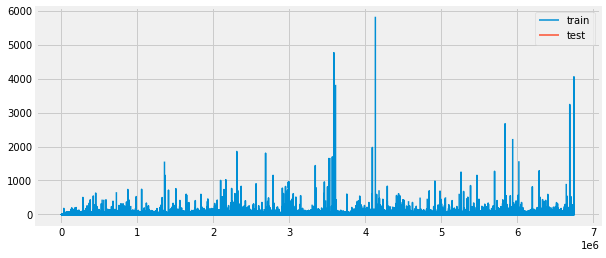

In [22]:
#!pip3 install sklearn
#!pip3 install matplotlib

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

vtrans['EntranceTime'] = pd.to_datetime(vtrans['EntranceTime'], format='%Y/%m/%d')


steps = 36
data_train = vtrans[:-steps]
data_test  = vtrans[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['BusinessHours'].plot(ax=ax, label='train')
data_test['BusinessHours'].plot(ax=ax, label='test')
ax.legend();




In [28]:
#!pip3 install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg


forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster.fit(y=data_train['BusinessHours'])
forecaster

steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(5)

fig, ax = plt.subplots(figsize=(9, 4))
data_train['BusinessHours'].plot(ax=ax, label='train')
data_test['BusinessHours'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='Business Hours Predictions')
ax.legend();

Defaulting to user installation because normal site-packages is not writeable
  Using cached skforecast-0.4.3-py2.py3-none-any.whl (87 kB)
  Using cached pandas-1.4.0-cp38-cp38-macosx_11_0_arm64.whl (10.3 MB)
  Using cached statsmodels-0.13.0.tar.gz (17.8 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [4829 lines of output]
      Ignoring numpy: markers 'python_version == "3.7"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.9"' don't match your environment
      Ignoring numpy: markers 'python_version > "3.9"' don't match your environment
        Using cached setuptools-63.2.0-py3-none-any.whl (1.2 MB)
        Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
        Using cached Cython-0.29.30-py2.py3-none-any.whl (985 kB)
        Using cached numpy-1.17.4.zip (6.4 MB)
        Preparing metadata (setup.py): st

            C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -iwithsysroot/System/Library/Frameworks/System.framework/PrivateHeaders -iwithsysroot/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.8/Headers -arch arm64 -arch x86_64 -Werror=implicit-function-declaration
      
            compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/include/python3.8 -c'
            clang: _configtest.c
            clang _configtest.o -o _configtest
            success!
            removing: _configtest.c _configtest.o _configtest.o.d _configtest
            C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -i

ModuleNotFoundError: No module named 'skforecast'